In [4]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('P3_1.csv')

numeric = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numeric.append(col)
print(numeric)

numeric_df = df[numeric]

['Age', 'Fnlwgt', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == object:
        if col == 'Income_Bracket' or col == 'Relationship' or col == 'Marital_Status': continue
        df[col+'_encode'] = le.fit_transform(df[col])

In [4]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Capital_Gain', 'Capital_Loss',
       'Hours_Per_Week', 'Native_Country', 'Income_Bracket',
       'WorkClass_encode', 'Education_encode', 'Occupation_encode',
       'Gender_encode', 'Native_Country_encode'],
      dtype='object')

In [5]:
ploted_cols = [c for c in df.columns if df[c].dtype in [np.int64, np.float64] or c.endswith('_encode')] 

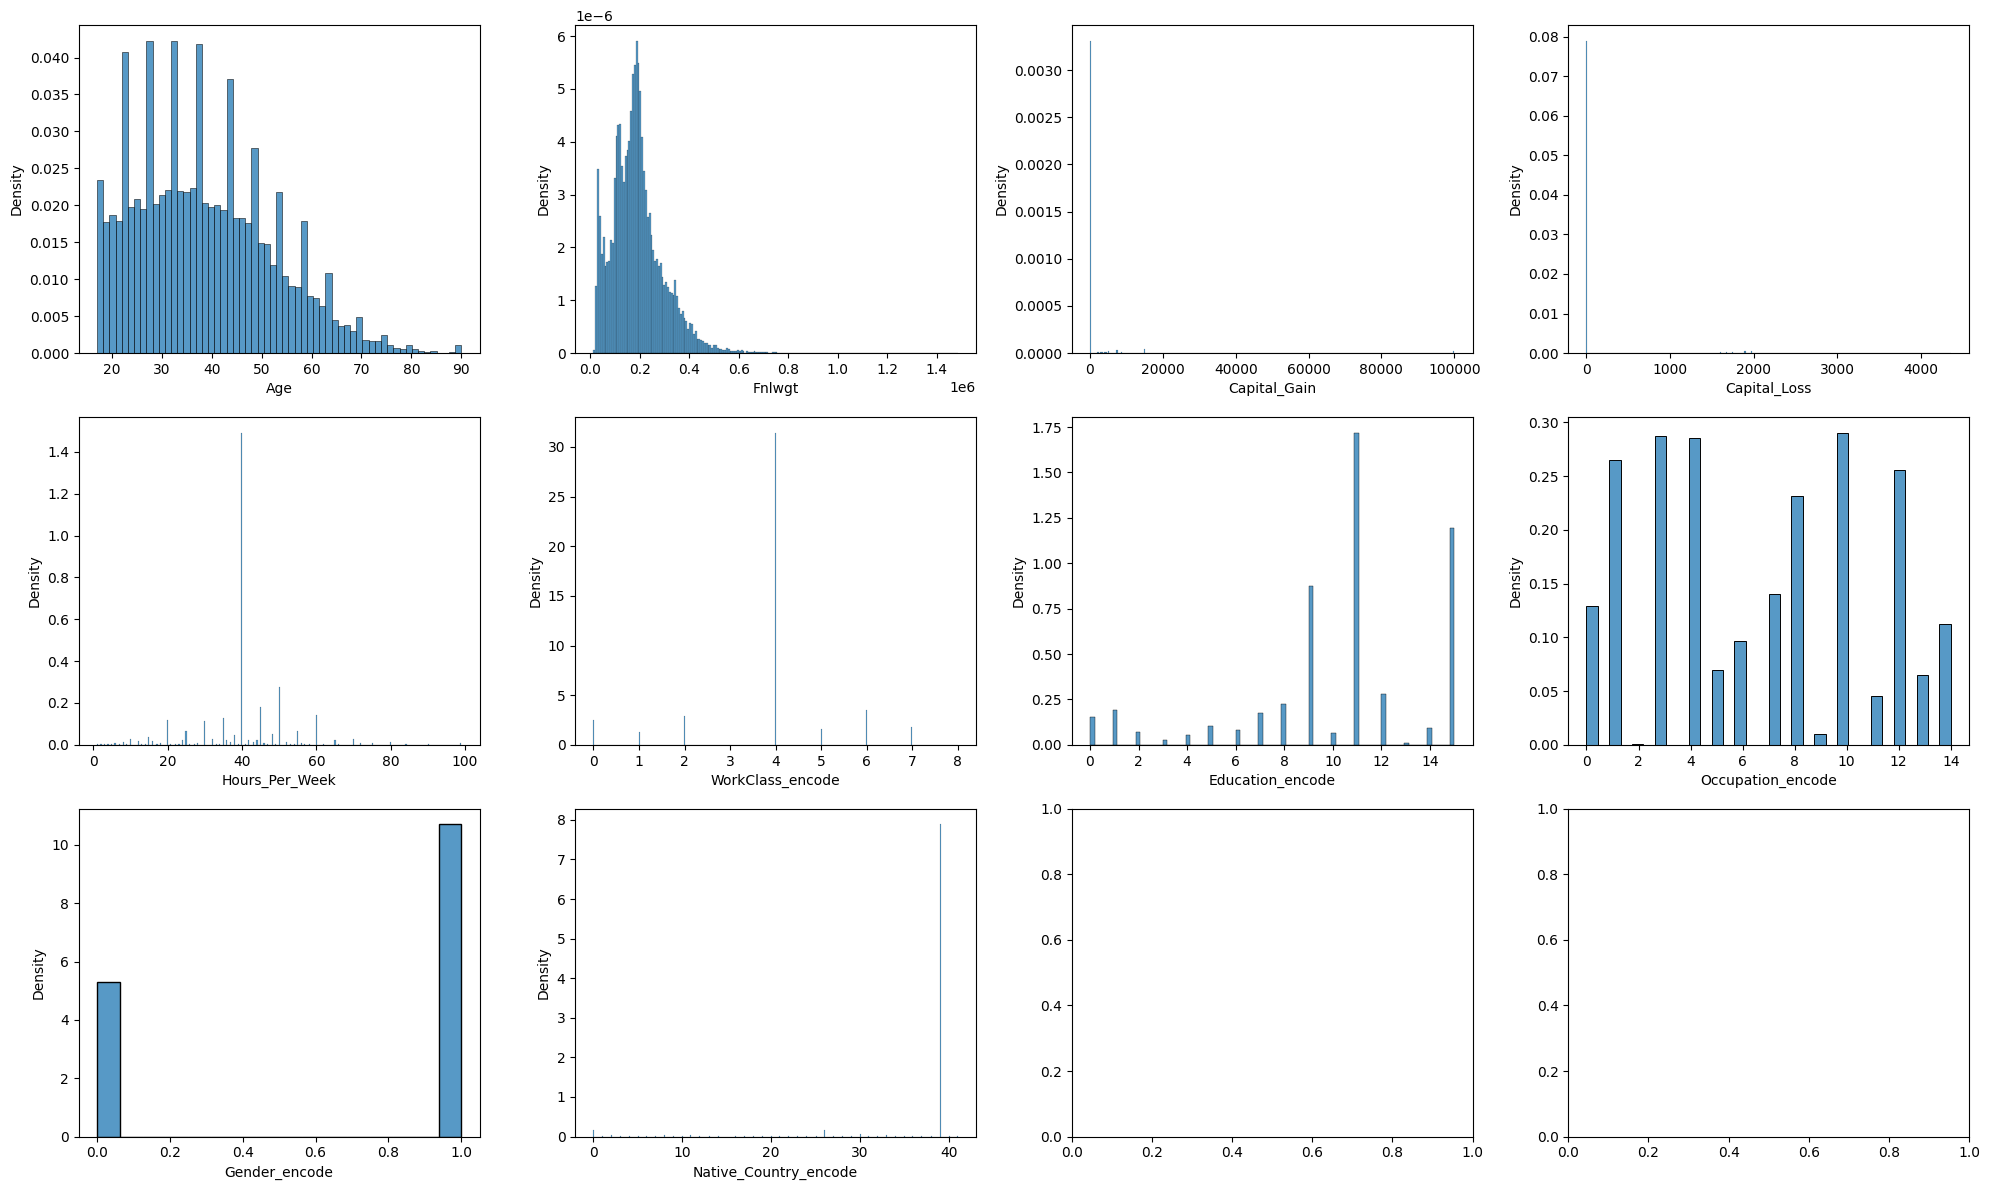

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

n_cols = 4
n_plots = len(ploted_cols)
n_rows = int(np.ceil(n_plots / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = np.array(axes).reshape(n_rows, n_cols)  

for i, col in enumerate(ploted_cols):
    r = i // n_cols
    c = i % n_cols
    sns.histplot(data=df, x=col, ax=axes[r, c], stat='density')

plt.tight_layout()
plt.show()


# Second Question

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [9]:
df = pd.read_csv('P3_1.csv')

In [10]:
new_cols = [c for c in df.columns if df[c].dtype == 'object' and c not in ['Income_Bracket', 'Marital_Status']]
new_cols

['WorkClass',
 'Education',
 'Occupation',
 'Relationship',
 'Gender',
 'Native_Country']

In [11]:
df = df[new_cols]
df.head()

,WorkClass,Education,Occupation,Relationship,Gender,Native_Country
0,State-gov,Bachelors,Adm-clerical,Not-in-family,Male,United-States
1,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,Male,United-States
2,Private,HS-grad,Handlers-cleaners,Not-in-family,Male,United-States
3,Private,11th,Handlers-cleaners,Husband,Male,United-States
4,Private,Bachelors,Prof-specialty,Wife,Female,Cuba


In [12]:
df.shape

(32561, 6)

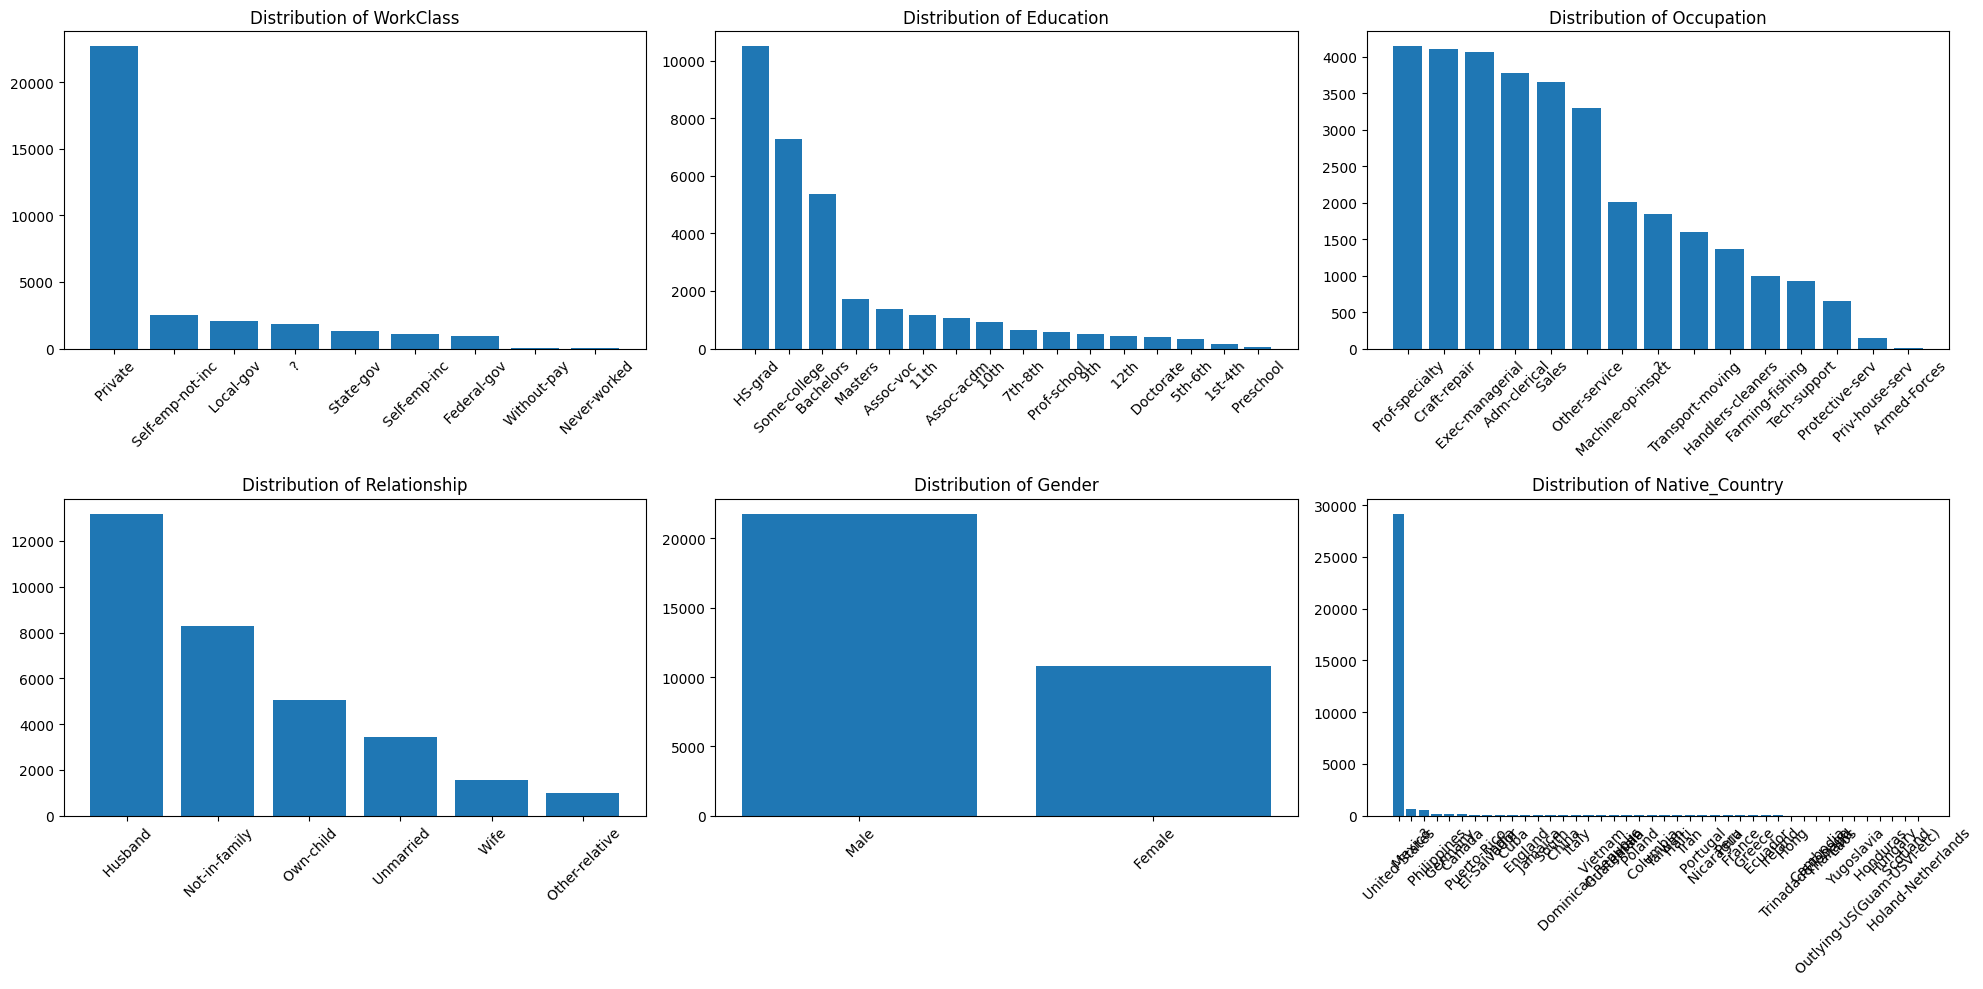

In [13]:
cols = 3
rows = int(np.ceil(len(new_cols) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

for i, col in enumerate(new_cols):
    r = i // cols
    c = i % cols

    # Get category counts sorted in descending order
    counts = df[col].value_counts().sort_values(ascending=False)

    axes[r, c].bar(counts.index, counts.values)
    axes[r, c].set_title(f'Distribution of {col}')
    axes[r, c].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
